# MMC - Laboratorium 3 - Bartosz Sosik (310287)

## Zadanie 1

In [1]:
from matplotlib import pyplot as plt
import math
import random
import numpy as np
from scipy.stats import norm

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Jeśli $R_n$ jest sumą $n$ niezależnych zmiennych losowych o rozkładzie równomiernym $U(0,1)$, to rozkład zmiennej $Y=\frac{R_n-\frac{n}{2}}{\sqrt{\frac{n}{12}}}$ dąży do rozkładu normalnego $N(0,1)$.

In [8]:
def generate_normal_sample(n):
    uniform_samples = list()
    for i in range(n):
        uniform_samples.append(random.uniform(0.0, 1.0))
    normal_sample = (sum(uniform_samples) - n/2)/math.sqrt(n/12)
    return normal_sample

Przyjęto $n=12$, a następnie wygenerowano 100 tysięcy liczb. Histogram przedstawiony został na wykresie wraz z teoretyczną funkcją gęstości prawdopodobieństwa dla rozkładu normalnego $N(0,1)$.

Text(0.5, 1.0, 'Porównanie generatora z teoretycznym rozkładem')

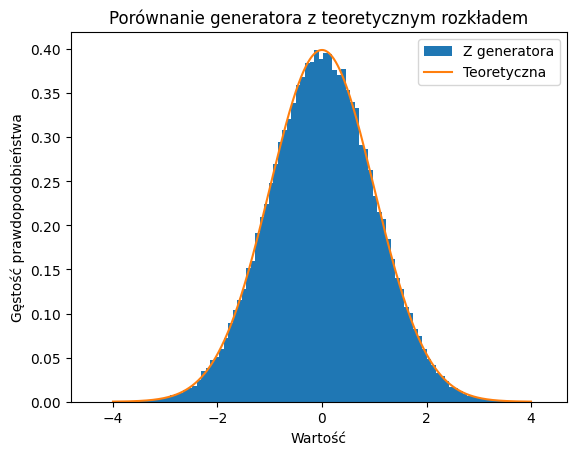

In [9]:
n = 30
count = 100000
normal_samples = list()
for i in range(count):
    normal_samples.append(generate_normal_sample(n))

plt.hist(normal_samples, bins=100, density=True, label="Z generatora")

x = np.linspace(-4.0, 4.0, count)
plt.plot(x, norm.pdf(x), label="Teoretyczna")
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend(loc='best')
plt.title("Porównanie generatora z teoretycznym rozkładem")

Możemy zaobserwować, że faktycznie rozkład takiej zmiennej losowej zbiega do rozkładu normalnego $N(0,1)$. Największe rozbieżności obserwujemy dla wartości 0, jednak nie są one przesadnie duże. Należy pamiętać, że histogram jest dość "gęsty" - został podzielony na 100 przedziałów.

# Zadanie 2

In [2]:
import time

Przekształcenie Boxa i Mullera \
Generujemy niezależnie zmienne losowe $U_1$ oraz $U_2$ z rozkładu równomiernego $U(0,1)$. Zmienne losowe $X=\sqrt{-2lnU_1}cos(2\pi U_2)$ oraz $X=\sqrt{-2lnU_1}sin(2\pi U_2)$ będą niezależnymi zmiennymi losowymi o rozkładzie $N(0,1)$.

In [3]:
def generate_box_muller():
    u1 = random.uniform(0.0, 1.0)
    u2 = random.uniform(0.0, 1.0)
    X = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    Y = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return X, Y

Przekształcenie Marsaglii i Braya \
Generujemy dwie niezależne zmienne losowe $U_1$ oraz $U_2$ z rozkładu równomiernego $U(-1,1)$. Następnie obliczamy wartość wyrażenia $B=U_1^2+U_2^2$. Jeśli $B>1$ procedurę powtarzamy. Jeśli nie, wówczas wyznaczamy zmienne $X=U_1Z$ oraz $Y=U_2Z$, gdzie $Z=\sqrt{\frac{-2lnB}{B}}$. Mają one rozkład normalny $N(0,1)$.

In [4]:
def generate_marsaglia_bray():
    B = 10
    while B > 1:
        u1 = random.uniform(-1.0, 1.0)
        u2 = random.uniform(-1.0, 1.0)
        B = pow(u1, 2) + pow(u2, 2)
    Z = math.sqrt((-2*math.log(B))/B)
    X = u1*Z
    Y = u2*Z
    return X, Y

In [6]:
count = 10000
box_muller_values = list()
marsaglia_bray_values = list()

# Generowanie Box Muller
start_time = time.time()
for i in range(count):
    box_muller_values.append(generate_box_muller())
end_time = time.time()
print(f'Box-Muller Generation Time: {end_time-start_time}')

# Generowanie Marsaglia Bray
start_time = time.time()
for i in range(count):
    marsaglia_bray_values.append(generate_marsaglia_bray())
end_time = time.time()
print(f'Marsaglia-Bray Generation Time: {end_time-start_time}')


Box-Muller Generation Time: 0.08485913276672363
Marsaglia-Bray Generation Time: 0.0352015495300293


Po wygenerowaniu 100 tys. liczb możemy zobaczyć, że czas potrzebny na ich wygenerowanie jest dość podobny dla obu przekształceń. Mimo wszystko, szybszy okazał się algorytm Marsaglii i Braya, pomimo występowania tam warunku $B>1$. Eksperyment powtórzony został kilka razy, a usyskiwane rezultaty potwierdzały tą obserwację. W algorytmie Boxa i Mullera dokonywane jest wiele złożonych operacji matematycznych, co powoduje, że jest on mniej efektywny czasowo.

## Wyniki Box-Muller

Text(0, 0.5, 'Gęstość prawdopodobieństwa')

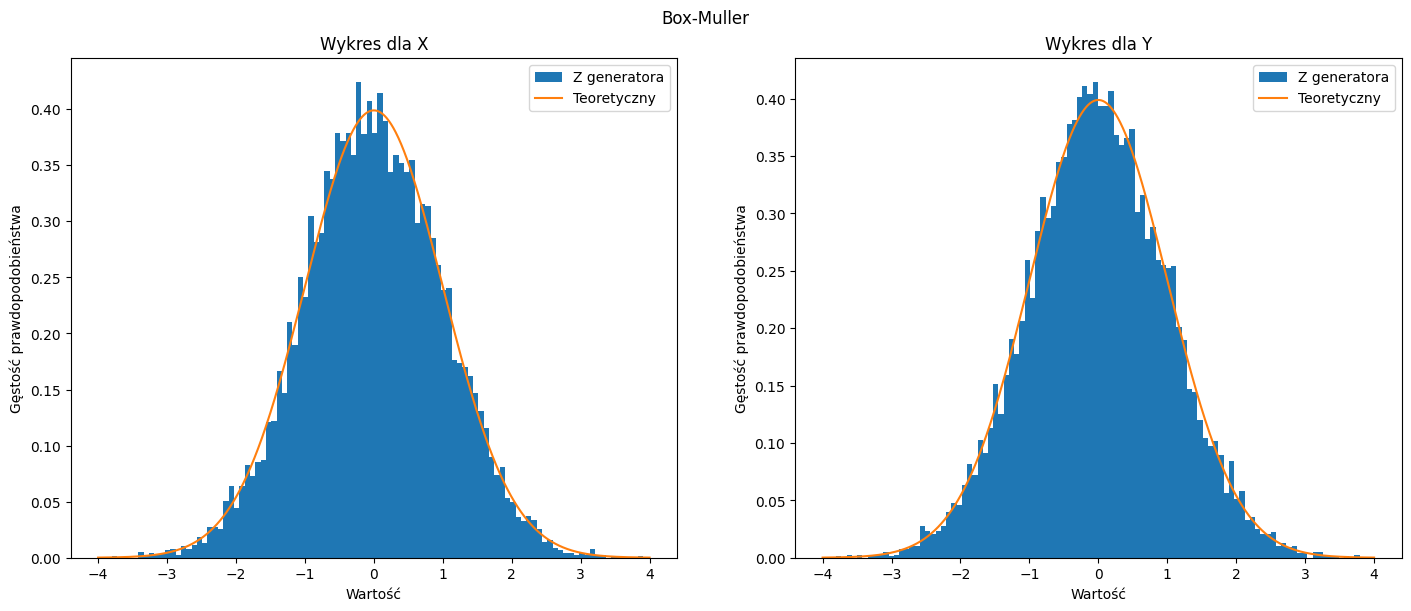

In [7]:
fig = plt.figure(layout='constrained', figsize=(14, 6))
fig.suptitle("Box-Muller")
subfigs = fig.subfigures(1, 2, wspace=0.07)
axLeft = subfigs[0].subplots(1, 1, sharey=True)
axRight = subfigs[1].subplots(1, 1, sharey=True)

axLeft.hist(list(zip(*box_muller_values))[0], bins=100, density=True, label="Z generatora")
x = np.linspace(-4.0, 4.0, 1000)
axLeft.plot(x, norm.pdf(x), label="Teoretyczny")
axLeft.set_title('Wykres dla X')
axLeft.legend(loc='best')
axLeft.set_xlabel("Wartość")
axLeft.set_ylabel("Gęstość prawdopodobieństwa")


axRight.hist(list(zip(*box_muller_values))[1], bins=100, density=True, label="Z generatora")
axRight.plot(x, norm.pdf(x), label="Teoretyczny")
axRight.set_title('Wykres dla Y')
axRight.legend(loc='best')
axRight.set_xlabel("Wartość")
axRight.set_ylabel("Gęstość prawdopodobieństwa")

Możemy zaobserwować, że zarówno zmienna losowa $X$, jak i $Y$ zbiegają do rozkładu normalnego $N(0,1)$.

## Wyniki Marsaglia-Bray

Text(0, 0.5, 'Gęstość prawdopodobieństwa')

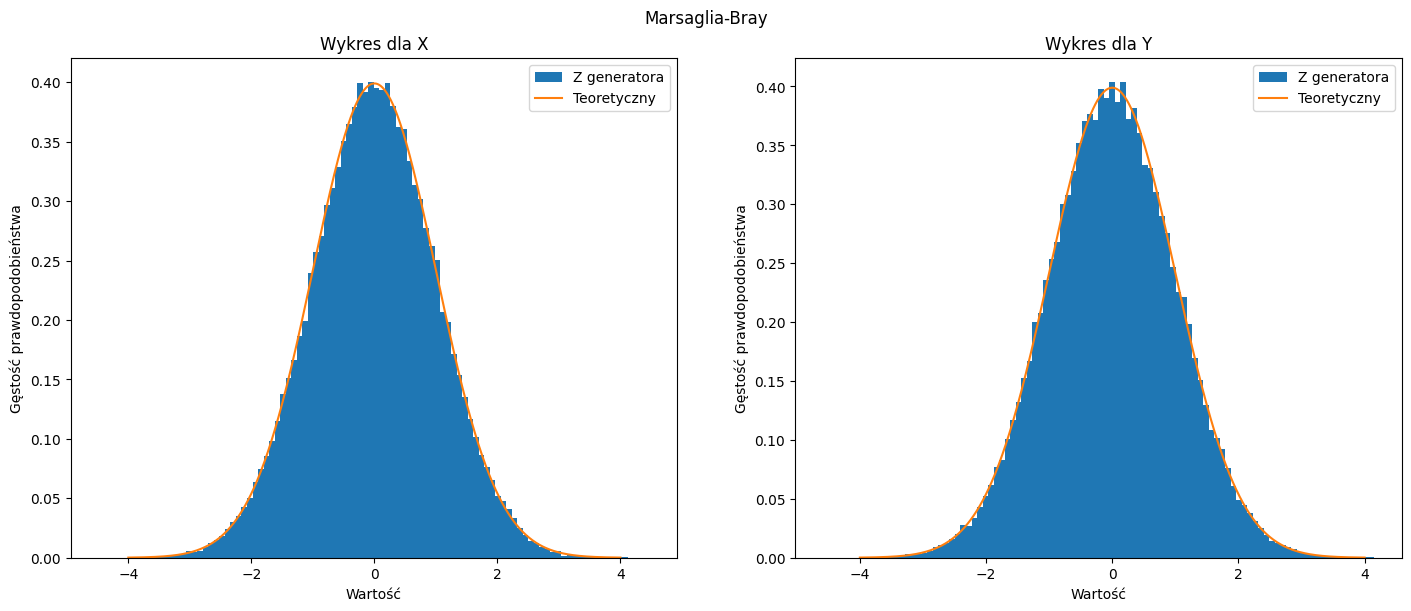

In [89]:
fig = plt.figure(layout='constrained', figsize=(14, 6))
fig.suptitle("Marsaglia-Bray")
subfigs = fig.subfigures(1, 2, wspace=0.07)
axLeft = subfigs[0].subplots(1, 1, sharey=True)
axRight = subfigs[1].subplots(1, 1, sharey=True)

axLeft.hist(list(zip(*marsaglia_bray_values))[0], bins=100, density=True, label="Z generatora")
x = np.linspace(-4.0, 4.0, 1000)
axLeft.plot(x, norm.pdf(x), label="Teoretyczny")
axLeft.set_title('Wykres dla X')
axLeft.legend(loc='best')
axLeft.set_xlabel("Wartość")
axLeft.set_ylabel("Gęstość prawdopodobieństwa")


axRight.hist(list(zip(*marsaglia_bray_values))[1], bins=100, density=True, label="Z generatora")
axRight.plot(x, norm.pdf(x), label="Teoretyczny")
axRight.set_title('Wykres dla Y')
axRight.legend(loc='best')
axRight.set_xlabel("Wartość")
axRight.set_ylabel("Gęstość prawdopodobieństwa")

Możemy zaobserwować, że zarówno zmienna losowa $X$, jak i $Y$ zbiegają do rozkładu normalnego $N(0,1)$.

# Zadanie 5

In [99]:
from scipy.stats import cauchy

Rozkład Cauchy'ego \
Jeżeli $X$ i $Y$ są niezależnymi zmiennymi losowymi o rozkładach $N(0,1)$, to zmienna $Z=X/Y$ ma rozkład Cauchy'ego $C(0,1)$.

In [104]:
def cauchy_generator():
    x = random.normalvariate(0.0, 1.0)
    y = random.normalvariate(0.0, 1.0)
    return x/y

Rozkład trójkątny \
Jeśli $X$ i $Y$ są zmiennymi losowymi o rozkładzie równomiernym na przedziale $(a/2, b/2)$, to zmienna losowa $Z=X+Y$ ma rozkład trójkątny na przedziale $(a, b)$.

In [109]:
def triangle_generator(a, b):
    x = random.uniform(a/2, b/2)
    y = random.uniform(a/2, b/2)
    return x + y

### Rozkład Cauchy'ego

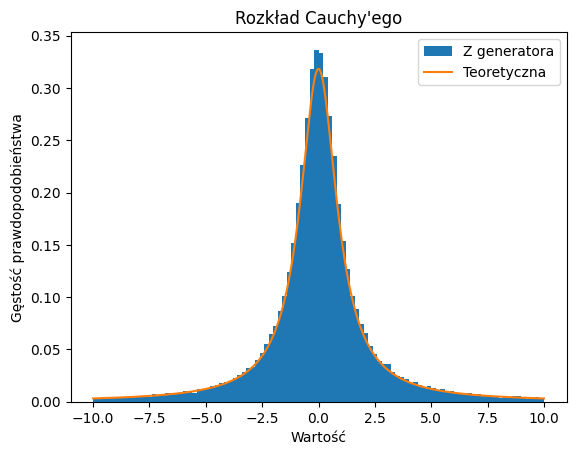

In [108]:
count = 100000
cauchy_values = list()
for i in range(count):
    cauchy_values.append(cauchy_generator())

x = np.linspace(-10.0, 10.0, 1000)
plt.hist(cauchy_values, bins=100, range=(-10.0, 10.0), density=True, label="Z generatora")
plt.plot(x, cauchy.pdf(x), label="Teoretyczna")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.title("Rozkład Cauchy'ego")
plt.legend(loc="best")

Wygenerowanie 100 tysięcy liczb za pomocą tak stworzonego generatora i wykreślenie wyników na tle funkcji analitycznej potwierdza, że wygenerowane liczby mają rozkład Cauchy'ego $C(0,1)$.

### Rozkład Trójkątny

In [115]:
from scipy.stats import triang

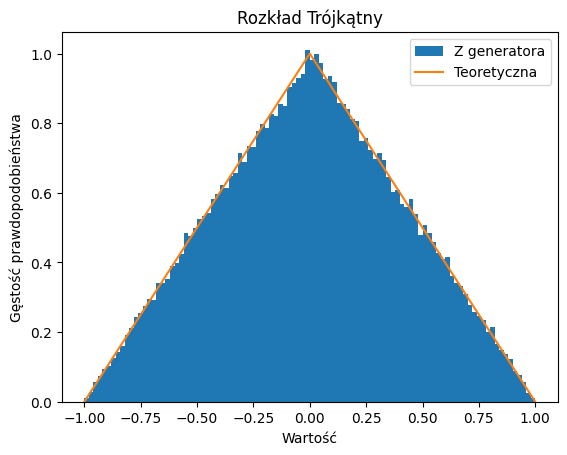

In [126]:
count = 100000
a = -1.0
b = 1.0
triangle_values = list()
for i in range(count):
    triangle_values.append(triangle_generator(a, b))

x = np.linspace(a, b, 1000)
plt.hist(triangle_values, bins=100, range=(a, b), density=True, label="Z generatora")
plt.plot(x, triang.pdf(x, 0.5, loc=-1, scale=2), label="Teoretyczna")
plt.xlabel("Wartość")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.title("Rozkład Trójkątny")
plt.legend(loc="best")

Wygenerowano 100 tysięcy liczb przy przyjęciu wartości $a=-1$ oraz $b=1$. Możemy zaobserwować, że faktycznie otrzymano rozkład trójkątny na przedziale $(-1, 1)$.